# Machine learning for everyone  
In this notebook, I show how computer simulation can be used in place of traditional statistics, and that it gives the same answers.  
The first cell is full of utility functions, and is not for non-programmers   

In [1]:
# imports
from IPython.display import Image
import warnings
from numpy.random import normal, randint
from numpy import mean
from numpy import hstack as merge
from scipy.stats import ttest_ind as ttest
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# utility functions
def my_dir(some_object):
   return([elt for elt in dir(some_object) if "_" not in elt]) 

def random_draw(number_of_subjects, data):
    random_indices = randint(0, high=data.shape[0]-1, size=number_of_subjects)
    return(data[random_indices].tolist())

def mean_average(input_list):
    return( sum(input_list)/(len(input_list) + 1) )

def convert_booleans_to_fraction(list_of_bools):
    return (sum(list_of_bools) / len(list_of_bools))

# Who's smarter: biologists or chemists!?
### We can simulate a dataset of the IQs of chemists and biologists (100 of each)

In [2]:
number_of_observations = 200 # the total number...
average_biologist_iq = 115
average_chemist_iq = 115
biologist_iq_sd = 10
chemist_iq_sd = 10
biologist_iq_data = normal(loc=average_biologist_iq, scale=biologist_iq_sd, size=int(number_of_observations/2))
chemist_iq_data = normal(loc=average_chemist_iq, scale=chemist_iq_sd, size=int(number_of_observations/2))

### Let's plot the data

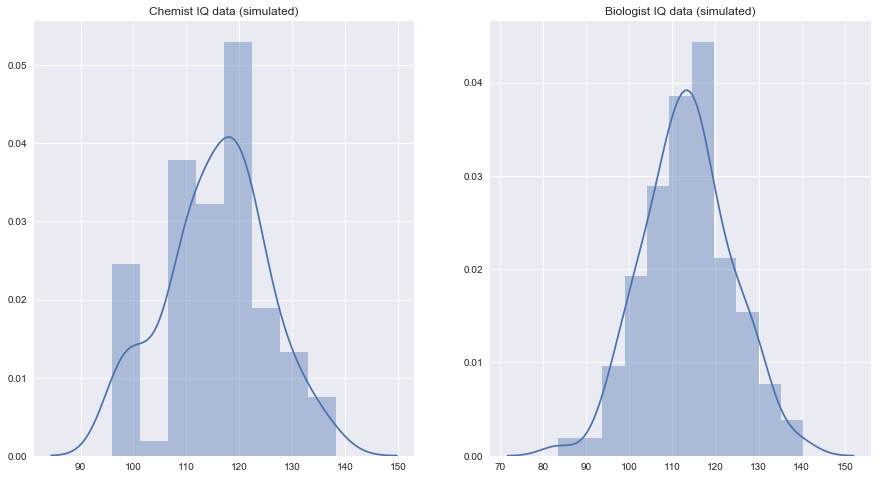

In [3]:
plt.rcParams['figure.figsize'] = 15,8
f, ax = plt.subplots(1,2)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.distplot(chemist_iq_data, ax=ax[0])
    sns.distplot(biologist_iq_data, ax=ax[1])

ax[0].set_title("Chemist IQ data (simulated)")
ax[1].set_title("Biologist IQ data (simulated)")

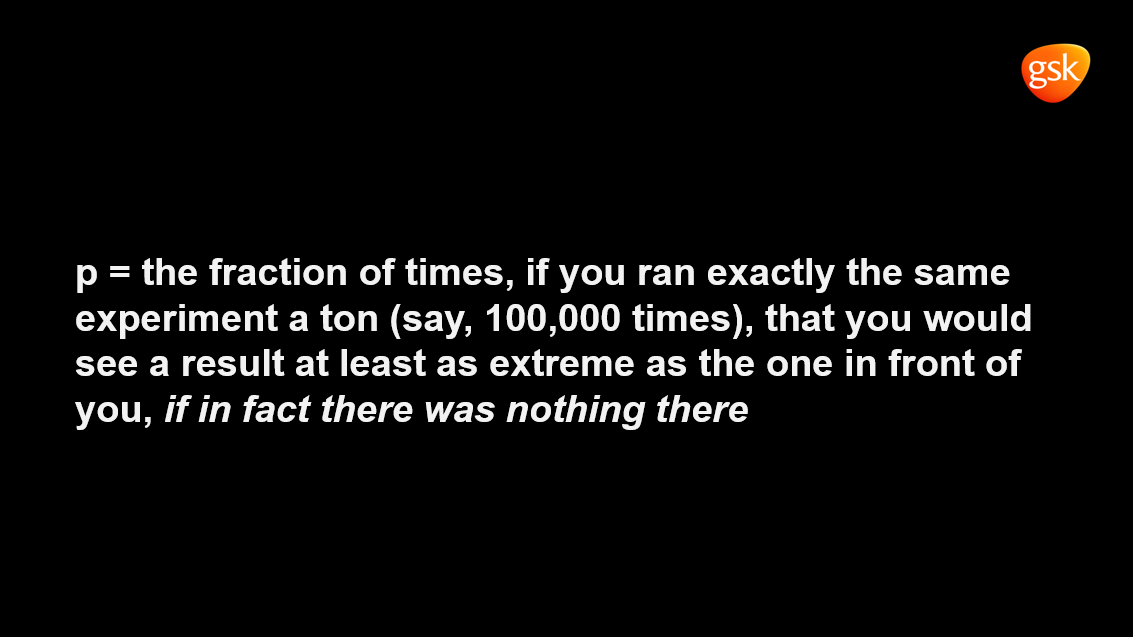

In [4]:
Image(filename='p-val-definition.png') 

### This requires three steps:  
1. What's the difference between the means in our data? In other words, what's the observation we are testing? 
2. How often do you see something this extreme if the null hypothesis is true? There is a neat trick for this (see below).  
3. What is this, as a fraction of the total. *This should be our p-value.*  

### Neat trick: *We can simulate the null being true by mixing up the datasets* 

## 1. What's the difference between the means in our data?

In [5]:
average_chemist_iq = mean_average(chemist_iq_data)
average_biologist_iq = mean_average(biologist_iq_data)
difference_between_the_two = abs( average_chemist_iq - average_biologist_iq )

print("Average chemist iq =", average_chemist_iq)
print("Average biologist iq =", average_biologist_iq)
print("The difference between the two averages is", difference_between_the_two)

Average chemist iq = 114.549894996
Average biologist iq = 112.336893177
The difference between the two averages is 2.21300181952


## 2. How often do you see something this extreme if the null hypothesis is true?

In [6]:
combined_data = merge([chemist_iq_data, biologist_iq_data])
number_of_experiments = 100000
difference_between_the_means = []

In [7]:
for i in range(number_of_experiments):
    draw_1 = random_draw(number_of_subjects=100, data=combined_data)
    draw_2 = random_draw(number_of_subjects=100, data=combined_data)
    difference_between_the_means.append( mean_average(draw_1) - mean_average(draw_2) )

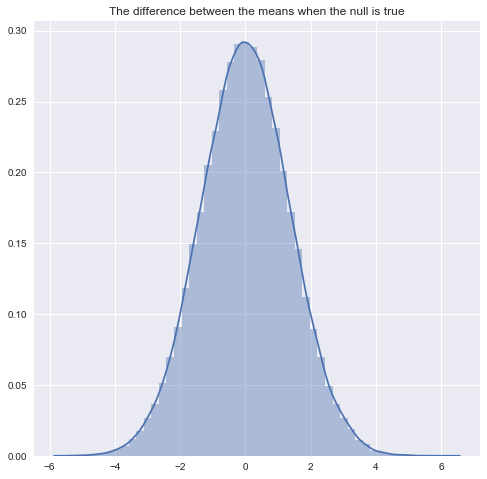

In [8]:
#plot the null distribution
plt.rcParams['figure.figsize'] = 8,8
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.distplot(difference_between_the_means)
plt.title("The difference between the means when the null is true")

It looks as though we would see differences at least that big, pretty much all the time!  
## 3. What is this, as a fraction of the total *this should be our p-value.*  

In [9]:
results = [abs(mean) > difference_between_the_two for mean in difference_between_the_means]
convert_booleans_to_fraction(results)

0.10463

##  Let's run a t-test and check...

In [10]:
ttest(chemist_iq_data, biologist_iq_data)

Ttest_indResult(statistic=1.6001134796803309, pvalue=0.11116778253034866)

## What happens if there **is** a difference?

In [11]:
average_biologist_iq = 110
average_chemist_iq = 115
# simulate new data
biologist_iq_data = normal(loc=average_biologist_iq, scale=biologist_iq_sd, size=int(number_of_observations/2))
chemist_iq_data = normal(loc=average_chemist_iq, scale=chemist_iq_sd, size=int(number_of_observations/2))

In [12]:
# Question 1
average_chemist_iq = mean_average(chemist_iq_data)
average_biologist_iq = mean_average(biologist_iq_data)
difference_between_the_two = average_chemist_iq - average_biologist_iq

print("Average chemist iq =", average_chemist_iq)
print("Average biologist iq =", average_biologist_iq)
print("The difference between the two averages is", difference_between_the_two)

Average chemist iq = 113.94247248
Average biologist iq = 108.3770674
The difference between the two averages is 5.56540507987


In [13]:
# Question 2
combined_data = merge([chemist_iq_data, biologist_iq_data])
number_of_experiments = 100000
difference_between_the_means = []
for i in range(number_of_experiments):
    draw_1 = random_draw(number_of_subjects=100, data=combined_data)
    draw_2 = random_draw(number_of_subjects=100, data=combined_data)
    difference_between_the_means.append( mean_average(draw_1) - mean_average(draw_2) )

In [14]:
results = [abs(mean) > difference_between_the_two for mean in difference_between_the_means]
convert_booleans_to_fraction(results)

6.0000000000000002e-05

In [15]:
ttest(chemist_iq_data, biologist_iq_data)

Ttest_indResult(statistic=4.028591126566587, pvalue=7.9946064273991074e-05)

## Key message:  
### Different philosophy, different methods... **same result**